# Loading Libraries

In [282]:
from keras.datasets.cifar10 import load_data
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import max_norm
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
%matplotlib inline

# Loading Data

In [9]:
# load the training data
(x_train, y_train), (_,_) = load_data()

# load the test data
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

In [234]:
categories = {
0: 'airplane',
1: 'automobile',
2: 'bird',
3: 'cat',
4: 'deer',
5: 'dog',
6: 'frog',
7: 'horse',
8: 'ship',
9: 'truck'
}

# 1. Basic EDA

In [5]:
# shape of x_train
x_train.shape

(50000, 32, 32, 3)

In [7]:
# shape of y_train
y_train.shape

(50000, 1)

In [13]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [17]:
# check the number of unique categories in y_train. It's going to be the target format of y_test
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
#test data is already flattened to be a vector
test_data.shape

(2000, 3072)

In [22]:
print("There are", x_train.shape[0], "images in the training datset")
print("The size of images are", x_train.shape[1], "by", x_train.shape[2])
print("There are", test_data.shape[0], "images in the test dataset")

There are 50000 images in the training datset
The size of images are 32 by 32
There are 2000 images in the test dataset


In [23]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [37]:
test_data[0:]

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,98,105,108,92,101,106,91,101,107,93,...,171,183,182,176,175,175,168,181,181,175
1,101,108,101,101,108,101,102,109,102,103,...,103,100,109,104,100,109,103,100,109,102
2,85,115,27,63,90,25,37,66,15,69,...,141,172,193,136,173,192,138,179,192,149
3,213,213,214,215,214,218,220,218,226,223,...,216,193,194,209,201,204,216,203,201,237
4,41,74,144,41,75,139,41,75,139,41,...,133,41,77,130,44,75,133,42,73,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,156,186,205,153,183,201,153,183,201,152,...,90,40,73,92,49,79,99,46,77,97
1996,68,101,169,69,103,173,70,104,176,71,...,58,61,73,64,51,62,53,49,61,52
1997,216,190,168,219,193,169,214,189,163,188,...,135,182,167,150,184,170,152,188,171,151
1998,46,24,17,43,32,11,77,82,60,117,...,147,102,134,146,100,131,145,99,130,148


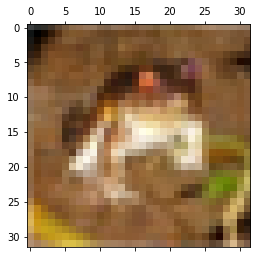

In [27]:
# to be honest, I can't make out what it is by eyes
plt.matshow(x_train[0])

In [47]:
#test_data is a dataframe
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,98,105,108,92,101,106,91,101,107,93,...,171,183,182,176,175,175,168,181,181,175
1,101,108,101,101,108,101,102,109,102,103,...,103,100,109,104,100,109,103,100,109,102
2,85,115,27,63,90,25,37,66,15,69,...,141,172,193,136,173,192,138,179,192,149
3,213,213,214,215,214,218,220,218,226,223,...,216,193,194,209,201,204,216,203,201,237
4,41,74,144,41,75,139,41,75,139,41,...,133,41,77,130,44,75,133,42,73,144


In [46]:
print("x_train range:", x_train.min(), "", x_train.max())
print("test range:", test_data.min().min(), "", test_data.max().max())

x_train range: 0  255
test range: 0  255


In [25]:
# cross check: category 6 is dog. I guess it's part of a dog head!
y_train[0]

array([6], dtype=uint8)

In [248]:
def show_images(x_train=x_train, y_train=y_train, start_index=0):
    num_rows, num_cols = 2, 5
    f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                        gridspec_kw={'wspace':0.15, 'hspace':0.01},
                        squeeze=True)
    for r in range(num_rows):
        for c in range(num_cols):
            image_index = start_index + r*5 + c
            ax[r,c].axis("off")
            ax[r,c].imshow(x_train[image_index])
            ax[r,c].set_title(categories[y_train[image_index].item()])
    plt.show()
    plt.close

In [247]:
np.squeeze(y_train[0])

array(6, dtype=uint8)

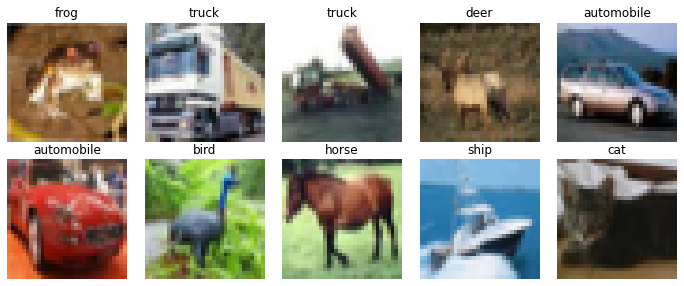

In [249]:
show_images()

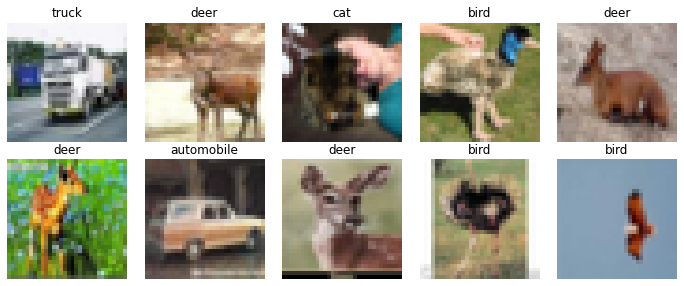

In [250]:
show_images(x_train, y_train, 1000)

# 2. Data Preprocessing

## 2.1 Normalization

In [48]:
x_train = x_train/255
test_data = test_data/255

## 2.2 Flattern x_train

In [49]:
x_train_flattened = x_train.reshape(x_train.shape[0],-1)
x_train_flattened.shape

(50000, 3072)

## 2.3 split the training data to be training and validation

In [51]:
x_tr, x_va, y_tr, y_va = train_test_split(x_train_flattened, y_train, test_size=0.20)
print(x_tr.shape)
print(x_va.shape)
print(y_tr.shape)
print(y_va.shape)

(40000, 3072)
(10000, 3072)
(40000, 1)
(10000, 1)


In [73]:
y_tr = to_categorical(y_tr)
y_va = to_categorical(y_va)
print(y_tr.shape)
print(y_va.shape)

(40000, 10)
(10000, 10)


# 3. Building models

# 3.1 Baseline: Very simple neural network with no hidden layers

In [75]:
# define the model
model1 = Sequential([
    Dense(10, input_shape=(3072,), activation='softmax')
])

In [76]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


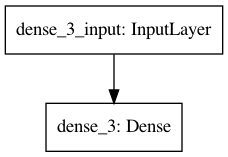

In [77]:
plot_model(model1, to_file='doc/img/model1.png')

In [78]:
# compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
model1.fit(x_tr, y_tr, validation_data =(x_va, y_va), epochs = 20)
# after training 20 epochs, the model is still not effective. need a better model

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8323 - accuracy: 0.3756 - val_loss: 1.9946 - val_accuracy: 0.3376
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8035 - accuracy: 0.3823 - val_loss: 1.9380 - val_accuracy: 0.3569
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8061 - accuracy: 0.3818 - val_loss: 1.8094 - val_accuracy: 0.3754
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7964 - accuracy: 0.3868 - val_loss: 1.8807 - val_accuracy: 0.3717
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7916 - accuracy: 0.3875 - val_loss: 1.8352 - val_accuracy: 0.3855
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7973 - accuracy: 0.3859 - val_loss: 1.9202 - val_accuracy: 0.3457
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7889 - accuracy: 0.3907 - val_loss: 1.7967 - val_accuracy:

# 3.2 Building Neural Network Model Using hidden layer

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________


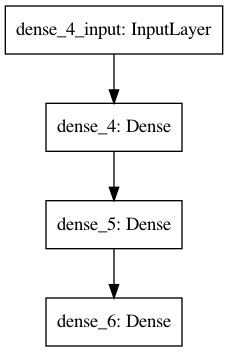

In [81]:
# define the model
model2 = Sequential([Dense(100, input_shape=(3072,), activation='relu'),
                    Dense(100, input_shape=(100,), activation='relu'),
                    Dense(10, activation='softmax')])
model2.summary()
plot_model(model2, to_file='doc/img/model2.png')

In [82]:
# compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
model2.fit(x_tr, y_tr, validation_data =(x_va, y_va), epochs = 20)
# after 20 epochs still not even reaching 50% accuracy. not good enough

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8822 - accuracy: 0.3168 - val_loss: 1.7434 - val_accuracy: 0.3659
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.7113 - accuracy: 0.3835 - val_loss: 1.6946 - val_accuracy: 0.3886
Epoch 3/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.6459 - accuracy: 0.4075 - val_loss: 1.6313 - val_accuracy: 0.4113
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5966 - accuracy: 0.4277 - val_loss: 1.7366 - val_accuracy: 0.3805
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5732 - accuracy: 0.4363 - val_loss: 1.5883 - val_accuracy: 0.4294
Epoch 6/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5423 - accuracy: 0.4479 - val_loss: 1.5888 - val_accuracy: 0.4343
Epoch 7/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5263 - accuracy: 0.4528 - val_loss: 1.6079 - val_accuracy:

# 3.3 a deeper net using more parameters

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 1,731,414
Trainable params: 1,731,414
Non-trainable params: 0
_________________________________________________________________


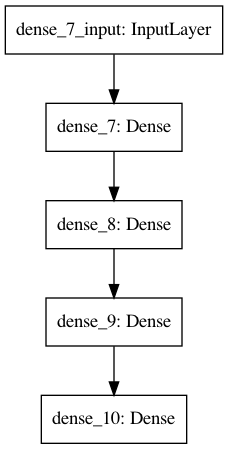

In [84]:
# define the model
model3 = Sequential([Dense(512, input_shape=(3072,), activation='relu'),
                    Dense(256, input_shape=(512,), activation='relu'),
                    Dense(100, input_shape=(256,), activation='relu'),                     
                    Dense(10, activation='softmax')])
model3.summary()
plot_model(model3, to_file='doc/img/model3.png')

In [85]:
# compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
model3.fit(x_tr, y_tr, validation_data =(x_va, y_va), epochs = 20)

Epoch 1/20
1250/1250 [==============================] - 19s 16ms/step - loss: 1.9028 - accuracy: 0.3058 - val_loss: 1.8184 - val_accuracy: 0.3541
Epoch 2/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.7214 - accuracy: 0.3787 - val_loss: 1.6744 - val_accuracy: 0.4071
Epoch 3/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6320 - accuracy: 0.4155 - val_loss: 1.6642 - val_accuracy: 0.4013
Epoch 4/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.5735 - accuracy: 0.4344 - val_loss: 1.6081 - val_accuracy: 0.4238
Epoch 5/20
1250/1250 [==============================] - 19s 15ms/step - loss: 1.5288 - accuracy: 0.4498 - val_loss: 1.5223 - val_accuracy: 0.4525
Epoch 6/20
1250/1250 [==============================] - 22s 17ms/step - loss: 1.4928 - accuracy: 0.4619 - val_loss: 1.5143 - val_accuracy: 0.4579
Epoch 7/20
1250/1250 [==============================] - 23s 18ms/step - loss: 1.4665 - accuracy: 0.4759 - val_loss: 1.5415 -

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_57 (Dense)             (None, 100)               25700     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 10)                1010      
Total params: 1,731,414
Trainable params: 1,731,414
Non-trainable params: 0
___________________________________________

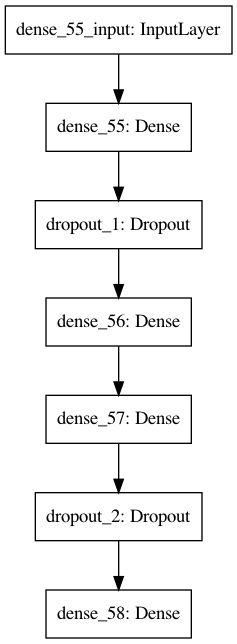

In [122]:
# define the model
model4 = Sequential([Dense(512, input_shape=(3072,), activation='relu'),
                     Dropout(0.2),
                    Dense(256, input_shape=(512,), activation='relu'),
                    Dense(100, input_shape=(256,), activation='relu'),
                    Dropout(0.5),
                    Dense(10, activation='softmax')])
model4.summary()
plot_model(model4, to_file='doc/img/model4.png')



In [123]:
#ajust learning rate
# lrate 0.1, batch_size 25, terrible, accuracy stays at 0.1
# lrate 0.01, batch_size 32, still terrible.
# changed the optimizer back to adam but still terrible. What was going on? 
# Had to define the model again, otherwise the results are weird
# lrate = 0.01, epochs = 25, batch_size = 32, working better now, after 25 epochs reached training-65%, validation-52%, promissing
# lrate = 0.02, epochs = 25, batch_size = 64, faster, training-64%, validation-52%. similar results
# lrate = 0.05, epochs = 50, batch_size = 64, training-67%, validation-51%. slightly better. 25 epochs benchmark not as good
# lrate = 0.01, epochs = 50, batch_size = 32, just to see how far it gets, training-82%, validation-52%. overfitting
# added two layers of dropout to deal with overfitting, just dragged training down to 56%, did not improve validation 52%
# I think that's enough for MLP

epochs = 50
lrate = 0.01
batch_size = 32
decay_rate = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay_rate,nesterov=False)
model4.compile(loss='categorical_crossentropy', 
               optimizer=sgd, 
               metrics=['accuracy'])

In [124]:
model4.fit(x_tr, y_tr, validation_data =(x_va, y_va), epochs = epochs, batch_size=batch_size)


Epoch 1/50
1250/1250 [==============================] - 19s 16ms/step - loss: 2.0691 - accuracy: 0.2252 - val_loss: 1.8861 - val_accuracy: 0.2966
Epoch 2/50
1250/1250 [==============================] - 18s 14ms/step - loss: 1.9177 - accuracy: 0.2953 - val_loss: 1.8183 - val_accuracy: 0.3347
Epoch 3/50
1250/1250 [==============================] - 18s 15ms/step - loss: 1.8444 - accuracy: 0.3328 - val_loss: 1.7512 - val_accuracy: 0.3550
Epoch 4/50
1250/1250 [==============================] - 21s 17ms/step - loss: 1.7883 - accuracy: 0.3535 - val_loss: 1.6853 - val_accuracy: 0.3907
Epoch 5/50
1250/1250 [==============================] - 19s 15ms/step - loss: 1.7474 - accuracy: 0.3728 - val_loss: 1.6799 - val_accuracy: 0.3878
Epoch 6/50
1250/1250 [==============================] - 23s 18ms/step - loss: 1.7078 - accuracy: 0.3854 - val_loss: 1.6348 - val_accuracy: 0.4110
Epoch 7/50
1250/1250 [==============================] - 24s 19ms/step - loss: 1.6789 - accuracy: 0.3976 - val_loss: 1.6254 -

In [133]:
model4.evaluate(x_va, y_va)

313/313 [==============================] - 2s 6ms/step - loss: 1.3547 - accuracy: 0.5193


[1.3546597957611084, 0.5192999839782715]

## predict test_data

In [238]:
y_predicted4 = model4.predict(test_data)
y_predicted4_index = np.argmax(y_predicted4, axis=1)

In [241]:
y_predicted4_index

array([6, 5, 4, ..., 3, 5, 4])

In [242]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [239]:
test_data_np = test_data.to_numpy()
test_data_np.shape
test_data_2d = test_data_np.reshape([2000,32,32,3])

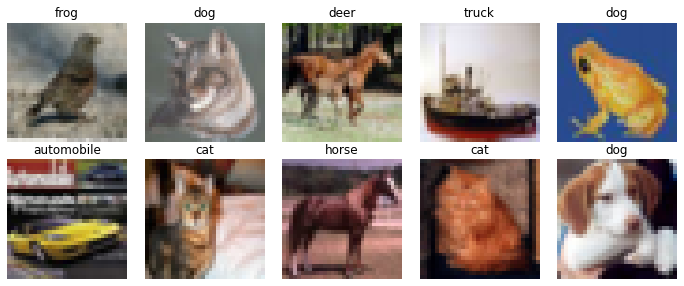

In [251]:
show_images(test_data_2d, y_predicted4_index, 0) #pretty terrible accuracy

## save the model

In [129]:
model4.save('results/model4_largerMLP.h5')

# 3.4 CNN

In [173]:
#data needs to be in 32,32,3
x_tr_2d = x_tr.reshape([40000,32,32,3])
x_va_2d = x_va.reshape([10000,32,32,3])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)             

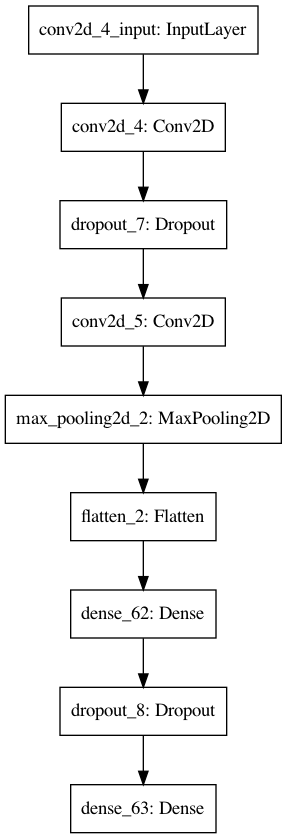

In [174]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model5.add(Dropout(0.2))
model5.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model5.add(MaxPooling2D())
model5.add(Flatten())
model5.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))
model5.summary()
plot_model(model5, to_file='doc/img/model5.png')

In [175]:
#very slow, but from epoch 2 the accuracy was higher than that of 50 epoch of MLP. Well it's done in an exercise except that was using all 50000 data
# first round epochs=50, lrate=0.1, batch_size=32. probably not worth doing 50. 25 is showing enough overfitting
# at apoch 18 it pretty much start overfitting, the validation accuracy stayed around 60%

epochs = 50
lrate = 0.01
decay_rate = lrate/epochs
batch_size = 32
sgd = SGD(lr=lrate, momentum=0.9, decay=decay_rate,nesterov=False)
model5.compile(loss='categorical_crossentropy', 
               optimizer=sgd, 
               metrics=['accuracy'])

In [176]:
history = model5.fit(x_tr_2d, y_tr, validation_data =(x_va_2d, y_va), epochs = epochs, batch_size=batch_size)

Epoch 1/50
1250/1250 [==============================] - 171s 137ms/step - loss: 1.7395 - accuracy: 0.3696 - val_loss: 1.4527 - val_accuracy: 0.4687
Epoch 2/50
1250/1250 [==============================] - 212s 170ms/step - loss: 1.3894 - accuracy: 0.5030 - val_loss: 1.2459 - val_accuracy: 0.5580
Epoch 3/50
1250/1250 [==============================] - 193s 154ms/step - loss: 1.2193 - accuracy: 0.5660 - val_loss: 1.1612 - val_accuracy: 0.5839
Epoch 4/50
1250/1250 [==============================] - 213s 171ms/step - loss: 1.0879 - accuracy: 0.6121 - val_loss: 1.0697 - val_accuracy: 0.6211
Epoch 5/50
1250/1250 [==============================] - 176s 140ms/step - loss: 0.9807 - accuracy: 0.6511 - val_loss: 1.0518 - val_accuracy: 0.6312
Epoch 6/50
1250/1250 [==============================] - 176s 141ms/step - loss: 0.8725 - accuracy: 0.6921 - val_loss: 0.9853 - val_accuracy: 0.6532
Epoch 7/50
1250/1250 [==============================] - 165s 132ms/step - loss: 0.7760 - accuracy: 0.7254 - val_

KeyboardInterrupt: 

In [177]:
model5.save('results/model5_CNN.h5')

In [188]:
model5.evaluate(x_va_2d, y_va) #as expected, validation accuracy is 69-70%

313/313 [==============================] - 10s 31ms/step - loss: 1.5297 - accuracy: 0.7000


[1.5296732187271118, 0.699999988079071]

In [190]:
test_data_np.shape

(2000, 3072)

In [191]:
test_data_2d = test_data_np.reshape([2000,32,32,3])
y_predicted5 = model5.predict(test_data_2d)

In [192]:
y_predicted5.shape

(2000, 10)

In [218]:
y_predicted5_index =(np.argmax(y_predicted5, axis = 1))
y_predicted5_index

array([2, 3, 7, ..., 3, 3, 6])

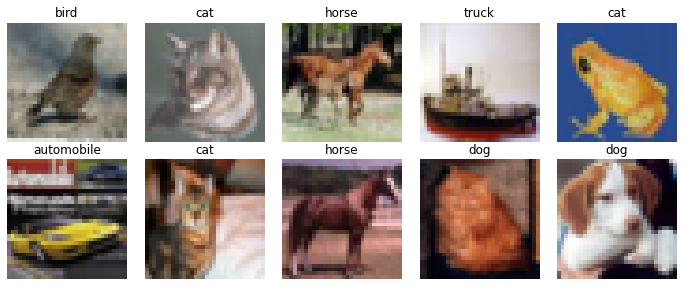

In [252]:
show_images(test_data_2d, y_predicted5_index, 0) #looing pretty good!

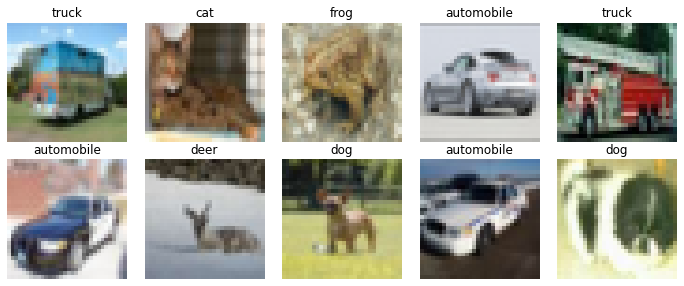

In [253]:
y_va_index = (np.argmax(y_va, axis = 1)) #looking good
show_images(x_va_2d, y_va_index, 0)

In [270]:
# save predictions to file
res = pd.DataFrame(y_predicted5_index)
res.columns = ["prediction"]
res.to_csv('results/prediction5.txt', index=False)

#submitted! score 69.4, exactly the same as the validation set

## 3.5 model6 larger CNN

In [178]:
def create_larger():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', kernel_constraint=max_norm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    return model

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_45 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_46 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 64)      

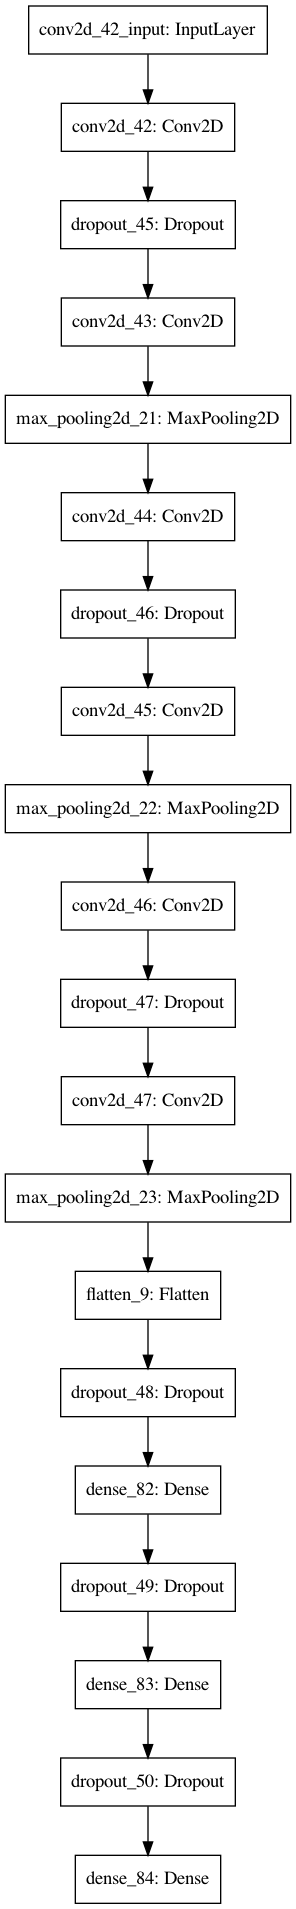

In [284]:
# Compile model
# Used the model from previous iteration
epochs = 50
lrate = 0.02
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model6 = create_larger()
# use pretrained weights before compiling?
# model6.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model6.summary()
plot_model(model6, to_file='doc/img/model6.png')

In [285]:
# set checkpoint
filepath="results/weights-improvement-{epoch:02d}-{loss:.4f}-biggerCNN.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit the model. The results are not better than the pretrained model. vadlidation accuracy only 78%
model6.load_weights('results/model6_largerCNN.h5')
model6.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history6 = model_larger.fit(x_tr_2d, y_tr, 
                            validation_data=(x_va_2d, y_va), 
                            epochs=epochs, batch_size=64, 
                            callbacks=callbacks_list)


Epoch 1/50
625/625 [==============================] - ETA: 0s - loss: 1.8869 - accuracy: 0.3050
Epoch 00001: loss improved from inf to 1.88690, saving model to results/weights-improvement-01-1.8869-biggerCNN.hdf5
625/625 [==============================] - 352s 563ms/step - loss: 1.8869 - accuracy: 0.3050 - val_loss: 1.7174 - val_accuracy: 0.3762
Epoch 2/50
625/625 [==============================] - ETA: 0s - loss: 1.5533 - accuracy: 0.4359
Epoch 00002: loss improved from 1.88690 to 1.55328, saving model to results/weights-improvement-02-1.5533-biggerCNN.hdf5
625/625 [==============================] - 384s 614ms/step - loss: 1.5533 - accuracy: 0.4359 - val_loss: 1.4853 - val_accuracy: 0.4517
Epoch 3/50
625/625 [==============================] - ETA: 0s - loss: 1.3836 - accuracy: 0.4970
Epoch 00003: loss improved from 1.55328 to 1.38361, saving model to results/weights-improvement-03-1.3836-biggerCNN.hdf5
625/625 [==============================] - 419s 670ms/step - loss: 1.3836 - accurac

625/625 [==============================] - ETA: 0s - loss: 0.4560 - accuracy: 0.8359
Epoch 00024: loss improved from 0.48362 to 0.45599, saving model to results/weights-improvement-24-0.4560-biggerCNN.hdf5
625/625 [==============================] - 329s 527ms/step - loss: 0.4560 - accuracy: 0.8359 - val_loss: 0.6906 - val_accuracy: 0.7671
Epoch 25/50
625/625 [==============================] - ETA: 0s - loss: 0.4497 - accuracy: 0.8390
Epoch 00025: loss improved from 0.45599 to 0.44967, saving model to results/weights-improvement-25-0.4497-biggerCNN.hdf5
625/625 [==============================] - 318s 509ms/step - loss: 0.4497 - accuracy: 0.8390 - val_loss: 0.6936 - val_accuracy: 0.7643
Epoch 26/50
625/625 [==============================] - ETA: 0s - loss: 0.4314 - accuracy: 0.8455
Epoch 00026: loss improved from 0.44967 to 0.43144, saving model to results/weights-improvement-26-0.4314-biggerCNN.hdf5
625/625 [==============================] - 354s 567ms/step - loss: 0.4314 - accuracy: 0.

Epoch 48/50
625/625 [==============================] - ETA: 0s - loss: 0.2252 - accuracy: 0.9186
Epoch 00048: loss improved from 0.22857 to 0.22519, saving model to results/weights-improvement-48-0.2252-biggerCNN.hdf5
625/625 [==============================] - 339s 542ms/step - loss: 0.2252 - accuracy: 0.9186 - val_loss: 0.7383 - val_accuracy: 0.7823
Epoch 49/50
625/625 [==============================] - ETA: 0s - loss: 0.2192 - accuracy: 0.9211
Epoch 00049: loss improved from 0.22519 to 0.21920, saving model to results/weights-improvement-49-0.2192-biggerCNN.hdf5
625/625 [==============================] - 313s 501ms/step - loss: 0.2192 - accuracy: 0.9211 - val_loss: 0.7381 - val_accuracy: 0.7812
Epoch 50/50
625/625 [==============================] - ETA: 0s - loss: 0.2148 - accuracy: 0.9212
Epoch 00050: loss improved from 0.21920 to 0.21480, saving model to results/weights-improvement-50-0.2148-biggerCNN.hdf5
625/625 [==============================] - 280s 448ms/step - loss: 0.2148 - 

In [185]:
# save the model
model6.save('results/model6_largerCNN.h5')
# Load pretrained model
model6.load_weights('results/model6_largerCNN.h5')

In [186]:
model6.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [187]:
# great accuracy on the validation data! Right, because this validation was part of the training data. oops. 
# Need to spend all night to train them again
model6.evaluate(x_va_2d, y_va)

313/313 [==============================] - 20s 63ms/step - loss: 0.2711 - accuracy: 0.9181


[0.27111998200416565, 0.9180999994277954]

In [277]:
y_predicted6 = model6.predict(test_data_2d)
y_predicted6_index = np.argmax(y_predicted6,axis=1)
y_predicted6_index

array([2, 3, 7, ..., 5, 5, 6])

In [278]:
res = pd.DataFrame(y_predicted6_index)
res.columns = ["prediction"]
res.to_csv('results/prediction6.txt', index=False)

#submitted, 77.85%, slightly better, but still how did others do 100?

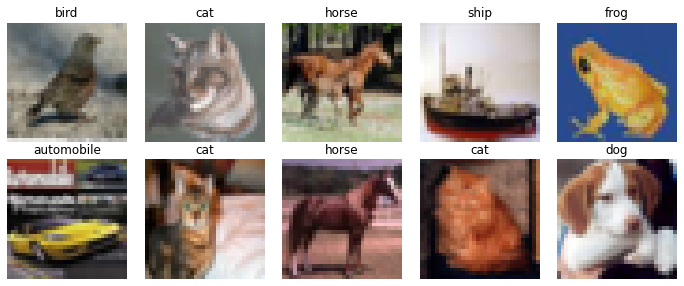

In [279]:
show_images(test_data_2d, y_predicted6_index, 0)